In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import sklearn.metrics
from sklearn.multiclass import OneVsRestClassifier
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [2]:
# adatok

data_2021 = pd.read_excel("C:/Users/Donát/Documents/GitHub/-nkutfel/ONKUTFEL2/NYERS_2021/data_2021_SZŰKJÓ.xlsx")
data_2019 = pd.read_excel("C:/Users/Donát/Documents/GitHub/-nkutfel/2019/2019_MAIN_CLEANED.xlsx")

In [3]:
# adattisztítás

data_2021 = data_2021.drop(labels = ["Name", "Neptun", "Tankör"], axis = 1)
data_2019 = data_2019.drop(labels = ["Name", "Neptun", "Tankör"], axis = 1)

# külön a kettőnél, először a 19-es
for i, row in data_2019.iterrows():
    data_2019.at[i, "Matek eredmény"] = float(row["Matek eredmény"][:-3] + "." + row["Matek eredmény"][-2])
    data_2019.at[i, "Kognitív eredmény"] = float(row["Kognitív eredmény"][:-3] + "." + row["Kognitív eredmény"][-2])
    data_2019.at[i, "Kognitív pont"] = float(str(row["Kognitív pont"]).replace(",", "."))
    data_2019.at[i, "Össz eredmény (átlag)"] = float(row["Össz eredmény (átlag)"][:-3] + "." + row["Össz eredmény (átlag)"][-2])

In [4]:
# Éveket jelölő oszlopok

list1 = ["2019" for _ in range(data_2019.shape[0])]
list2 = ["2021" for _ in range(data_2021.shape[0])]

data_2019["Év"] = list1
data_2021["Év"] = list2

working_data = pd.concat([data_2019, data_2021], ignore_index=True)
working_data['Matematika A1a - Analízis'] = working_data['Matematika A1a - Analízis'].astype(str)

In [5]:
data_2021.query('Szak == "Biomérnöki"').groupby('Matematika A1a - Analízis').count()

,Mat_term_tag,Emelt,Szak,Matek 1-4 helyes,Matek 5-10 helyes,Matek 11-14 helyes,Matek helyes,Matek eredmény,Kognitív pont,Kognitív eredmény,Össz eredmény (átlag),ZH0,Tanulmányi pont,Érettségi pont,Többletpont,Összes pont,Év
Matematika A1a - Analízis,,,,,,,,,,,,,,,,,
1,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
2,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
4,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [6]:
data_2019.groupby('Matematika A1a - Analízis').count()

,Mat_term_tag,Emelt,Szak,Matek 1-4 helyes,Matek 5-10 helyes,Matek 11-14 helyes,Matek helyes,Matek eredmény,Kognitív pont,Kognitív eredmény,Össz eredmény (átlag),ZH0,Tanulmányi pont,Érettségi pont,Többletpont,Összes pont,Matematika A2c,Év
Matematika A1a - Analízis,,,,,,,,,,,,,,,,,,
1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70
3,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75
4,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
5,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45


In [7]:
data_2021.groupby('Matematika A1a - Analízis').count()

,Mat_term_tag,Emelt,Szak,Matek 1-4 helyes,Matek 5-10 helyes,Matek 11-14 helyes,Matek helyes,Matek eredmény,Kognitív pont,Kognitív eredmény,Össz eredmény (átlag),ZH0,Tanulmányi pont,Érettségi pont,Többletpont,Összes pont,Év
Matematika A1a - Analízis,,,,,,,,,,,,,,,,,
1,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
2,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71
3,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
4,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
5,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23


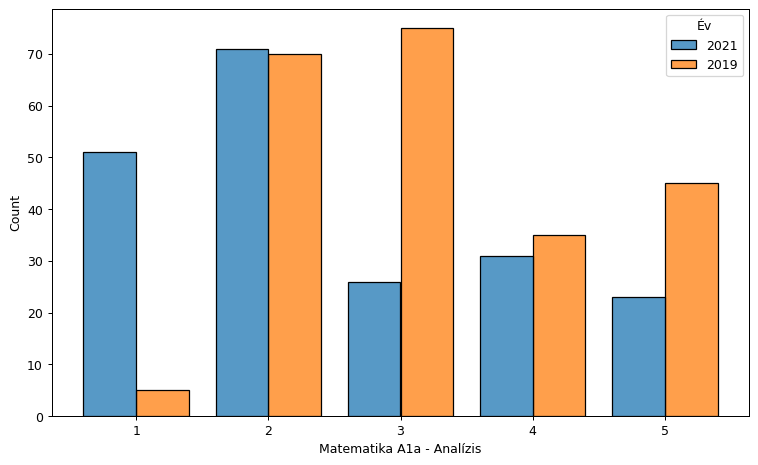

In [8]:
# Először az összes jegyet
working_data = working_data.sort_values(by='Matematika A1a - Analízis', axis=0, ascending=True)


import seaborn as sns
plt.figure(figsize=(10, 6), dpi=90)

sns.histplot(x='Matematika A1a - Analízis', data=working_data, hue='Év',  multiple="dodge", shrink=.8)
plt.show()

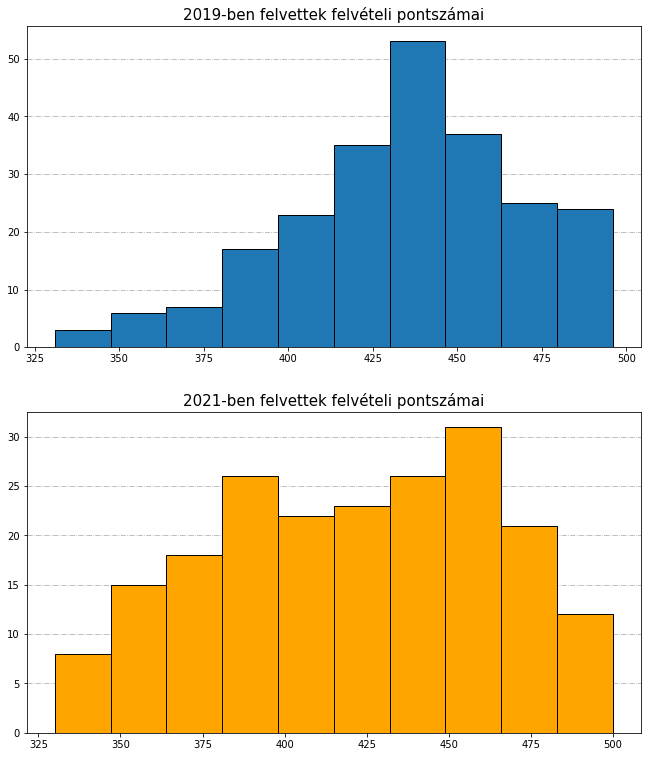

In [10]:
# felvételi pontszám alapján külön

fig, ax = plt.subplots(2, 1)
fig.set_figheight(13)
fig.set_figwidth(11)
ax[0].grid(which='major', axis = 'y', zorder=0, linestyle="-.")
ax[0].hist(x=working_data.query('Év == "2019"')['Összes pont'], zorder=3, edgecolor='black')
ax[0].set_title("2019-ben felvettek felvételi pontszámai", size=15)
ax[1].grid(which='major', axis = 'y', zorder=0, linestyle="-.")
ax[1].hist(x=working_data.query('Év == "2021"')['Összes pont'], zorder=3, edgecolor='black', color = 'orange')
ax[1].set_title("2021-ben felvettek felvételi pontszámai", size=15)
plt.show()

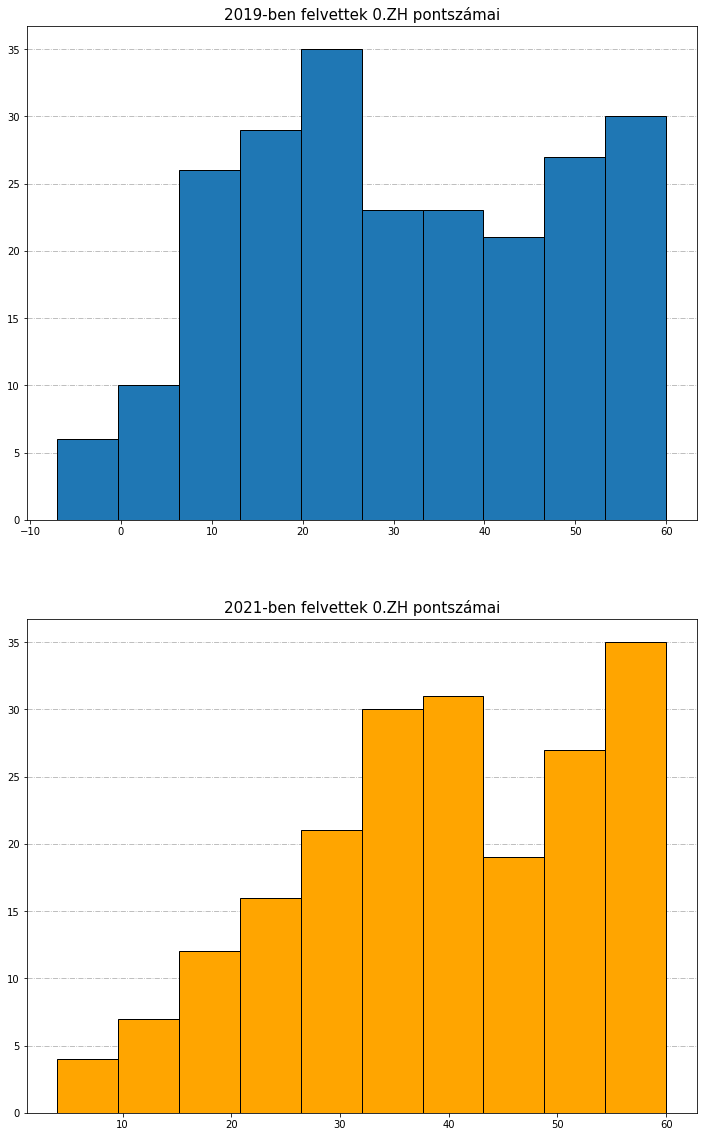

In [8]:
# 0. ZH pontszámok

fig, ax = plt.subplots(2, 1)
fig.set_figheight(20)
fig.set_figwidth(12)
ax[0].grid(which='major', axis = 'y', zorder=0, linestyle="-.")
ax[0].hist(x=working_data.query('Év == "2019"')['ZH0'], zorder=3, edgecolor='black')
ax[0].set_title("2019-ben felvettek 0.ZH pontszámai", size=15)
ax[1].grid(which='major', axis = 'y', zorder=0, linestyle="-.")
ax[1].hist(x=working_data.query('Év == "2021"')['ZH0'], zorder=3, edgecolor='black', color = 'orange')
ax[1].set_title("2021-ben felvettek 0.ZH pontszámai", size=15)
plt.show()

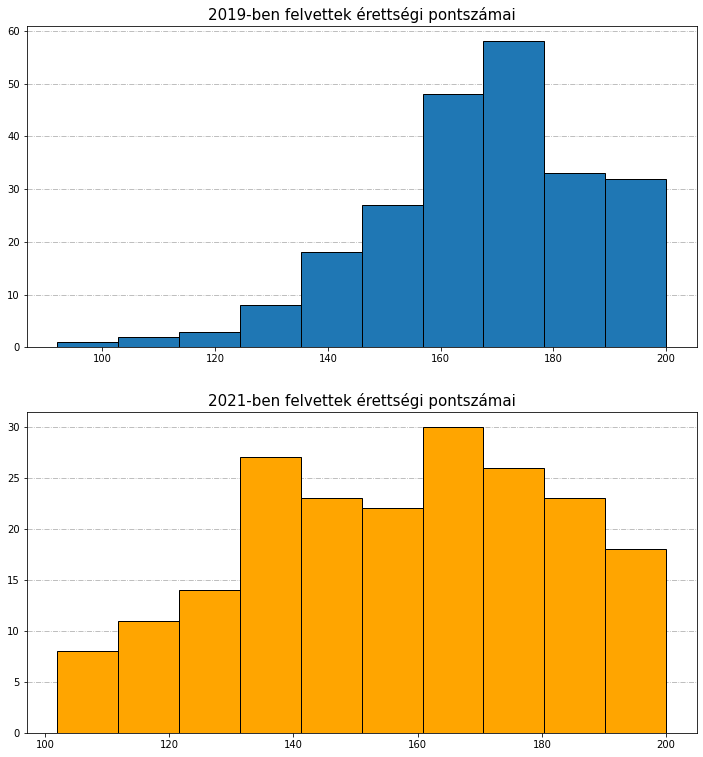

In [11]:
# Érettségi pont

fig, ax = plt.subplots(2, 1)
fig.set_figheight(13)
fig.set_figwidth(12)
ax[0].grid(which='major', axis = 'y', zorder=0, linestyle="-.")
ax[0].hist(x=working_data.query('Év == "2019"')['Érettségi pont'], zorder=3, edgecolor='black')
ax[0].set_title("2019-ben felvettek érettségi pontszámai", size=15)
ax[1].grid(which='major', axis = 'y', zorder=0, linestyle="-.")
ax[1].hist(x=working_data.query('Év == "2021"')['Érettségi pont'], zorder=3, edgecolor='black', color = 'orange')
ax[1].set_title("2021-ben felvettek érettségi pontszámai", size=15)
plt.show()

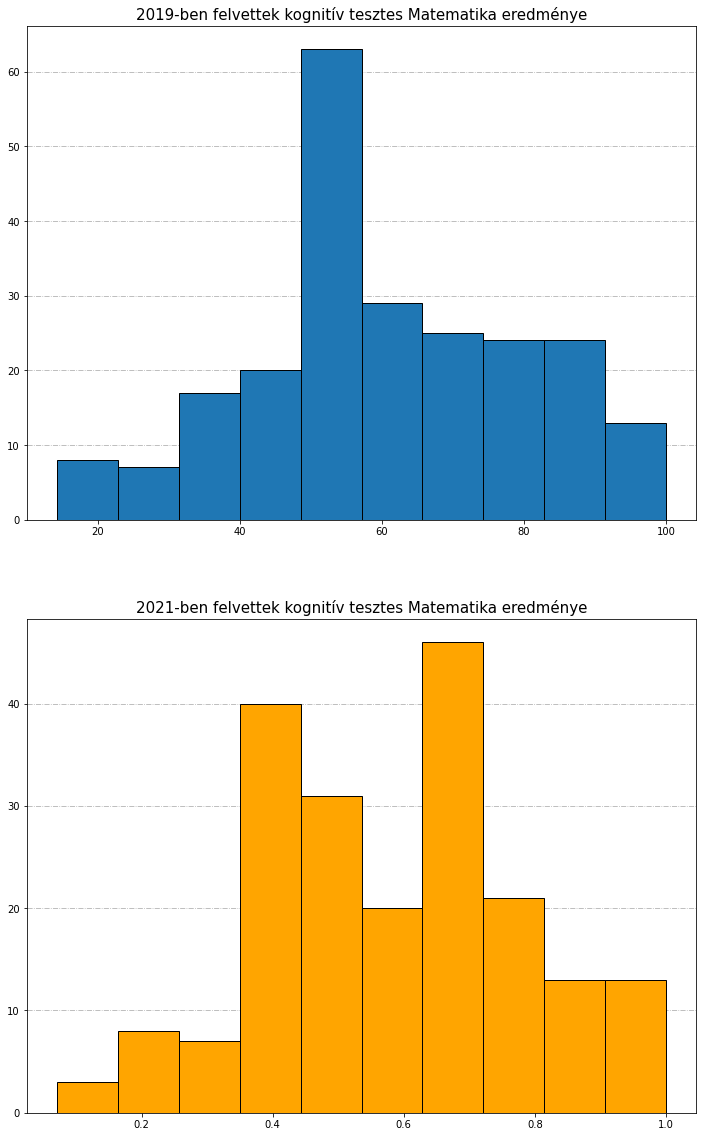

In [11]:
# Érettségi pont

fig, ax = plt.subplots(2, 1)
fig.set_figheight(20)
fig.set_figwidth(12)
ax[0].grid(which='major', axis = 'y', zorder=0, linestyle="-.")
ax[0].hist(x=working_data.query('Év == "2019"')['Matek eredmény'], zorder=3, edgecolor='black')
ax[0].set_title("2019-ben felvettek kognitív tesztes Matematika eredménye", size=15)
ax[1].grid(which='major', axis = 'y', zorder=0, linestyle="-.")
ax[1].hist(x=working_data.query('Év == "2021"')['Matek eredmény'], zorder=3, edgecolor='black', color = 'orange')
ax[1].set_title("2021-ben felvettek kognitív tesztes Matematika eredménye", size=15)
plt.show()

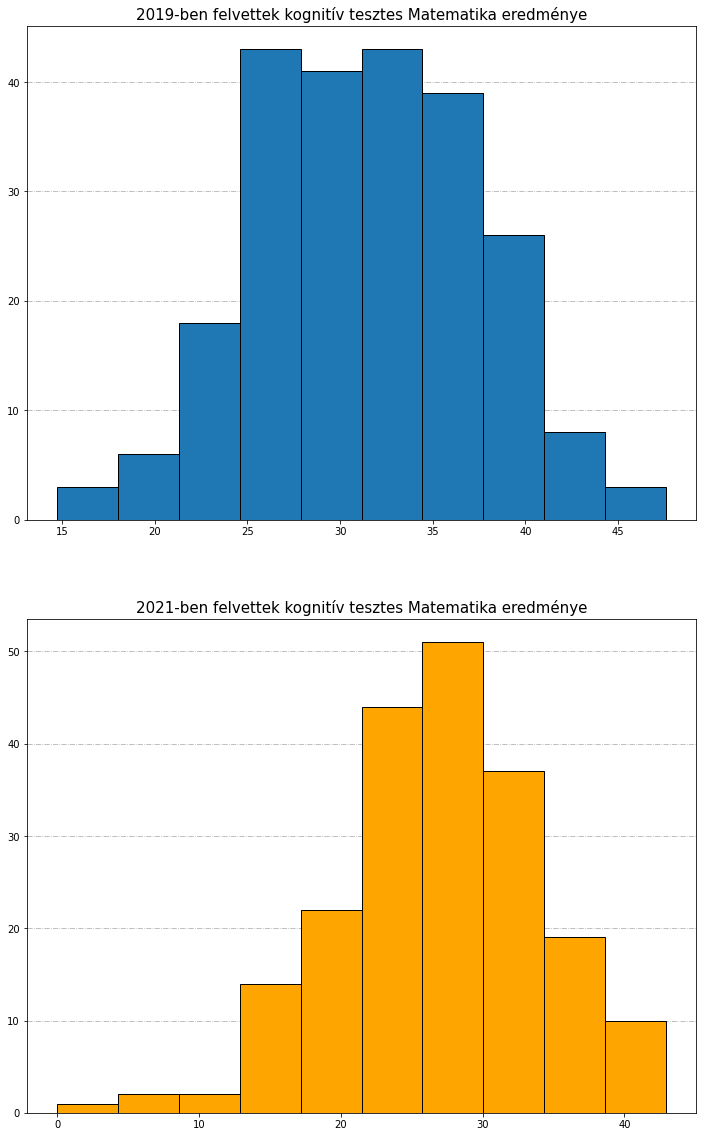

In [13]:
# Érettségi pont

fig, ax = plt.subplots(2, 1)
fig.set_figheight(20)
fig.set_figwidth(12)
ax[0].grid(which='major', axis = 'y', zorder=0, linestyle="-.")
ax[0].hist(x=working_data.query('Év == "2019"')['Kognitív pont'], zorder=3, edgecolor='black')
ax[0].set_title("2019-ben felvettek kognitív tesztes Matematika eredménye", size=15)
ax[1].grid(which='major', axis = 'y', zorder=0, linestyle="-.")
ax[1].hist(x=working_data.query('Év == "2021"')['Kognitív pont'], zorder=3, edgecolor='black', color = 'orange')
ax[1].set_title("2021-ben felvettek kognitív tesztes Matematika eredménye", size=15)
plt.show()